Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio anterior. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos



In [3]:
import pandas as pd
import sqlite3

# Leer los datos del archivo Excel
file_path = '/workspaces/Python-PC5/src/cripto_currency.xlsx'
crypto_data = pd.read_excel(file_path)

# Conectar a la base de datos SQLite
conn = sqlite3.connect('crypto_db.sqlite')

# Guardar el DataFrame en la base de datos
crypto_data.to_sql('crypto_data', conn, if_exists='replace', index=False)

# Cerrar la conexión a la base de datos
conn.close()


In [4]:
# Conectar a la base de datos
conn = sqlite3.connect('crypto_db.sqlite')

# Leer los datos desde la tabla en la base de datos
query = "SELECT * FROM crypto_data"
crypto_data_from_db = pd.read_sql(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Verificar la lectura de los datos
crypto_data_from_db.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-19T00:00:00,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184
1,2022-10-20T00:00:00,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420
2,2022-10-21T00:00:00,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866
3,2022-10-22T00:00:00,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957
4,2022-10-23T00:00:00,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335


In [6]:
import sqlite3

# Conectar a la base de datos
conn = sqlite3.connect('crypto_db.sqlite')

# Listar las tablas disponibles en la base de datos
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Mostrar el nombre de las tablas encontradas
for table in tables:
    print(table[0])

# Cerrar la conexión a la base de datos
conn.close()


crypto_data


In [7]:
# Conectar a la base de datos
conn = sqlite3.connect('crypto_db.sqlite')

# Leer los datos de la tabla 'crypto_data'
crypto_data = pd.read_sql("SELECT * FROM crypto_data", conn)

# Añadir una columna 'Type' para representar diferentes criptomonedas
# En este ejemplo, usaremos Bitcoin, Ethereum y Ripple
crypto_data['Type'] = 'Bitcoin'

# Mostrar los primeros registros del DataFrame resultante
crypto_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Type
0,2022-10-19T00:00:00,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184,Bitcoin
1,2022-10-20T00:00:00,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420,Bitcoin
2,2022-10-21T00:00:00,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866,Bitcoin
3,2022-10-22T00:00:00,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957,Bitcoin
4,2022-10-23T00:00:00,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335,Bitcoin


In [8]:
# Calculamos el resumen de datos por tipo de criptomoneda
summary_data = crypto_data.groupby('Type').agg({'Open': ['mean', 'max', 'min', 'std'],
                                               'High': ['mean', 'max', 'min', 'std'],
                                               'Low': ['mean', 'max', 'min', 'std'],
                                               'Close': ['mean', 'max', 'min', 'std'],
                                               'Adj Close': ['mean', 'max', 'min', 'std'],
                                               'Volume': ['mean', 'max', 'min', 'std']})

# Mostramos el resumen
summary_data


Open                                                   High  \
                 mean           max           min          std          mean   
Type                                                                           
Bitcoin  24652.877546  31474.720703  15782.300781  4584.694775  25028.054938   

                                                          Low                \
                  max           min         std          mean           max   
Type                                                                          
Bitcoin  31814.515625  16253.047852  4649.22606  24311.236659  30659.355469   

         ...        Close                  Adj Close                \
         ...          min          std          mean           max   
Type     ...                                                         
Bitcoin  ...  15787.28418  4581.679053  24677.854065  31476.048828   

                                         Volume                            \
                 min          std          mean           max         min   
Type                                                                        
Bitcoin  15787.28418  4581.679053  2.010118e+10  118992465607  5331172801   

                       
                  std  
Type                   
Bitcoin  1.276175e+10  

[1 rows x 24 columns]

In [9]:
# Guardar el resumen en un archivo Excel
summary_data.to_excel('summary_crypto_data.xlsx')


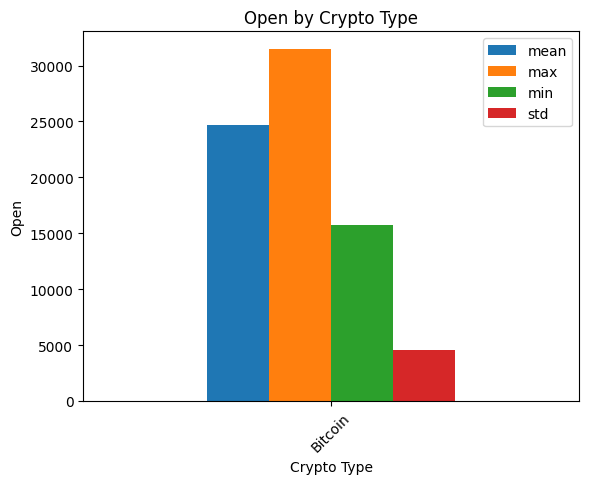

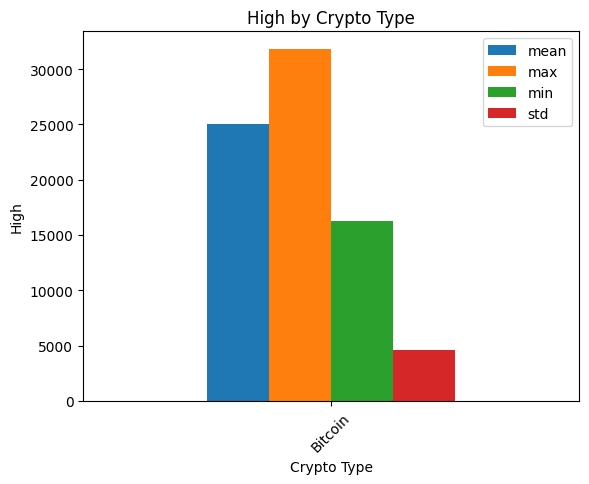

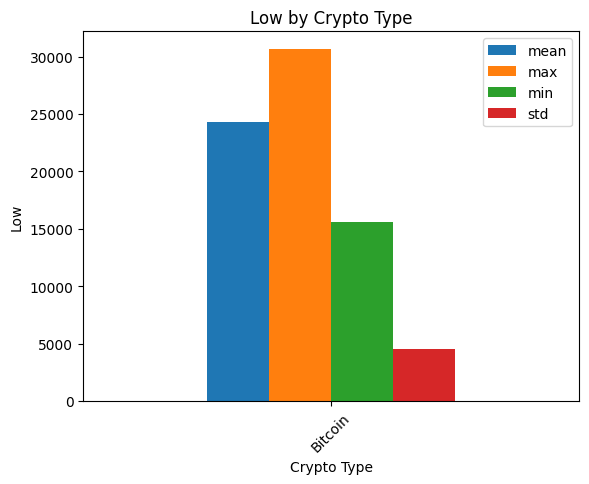

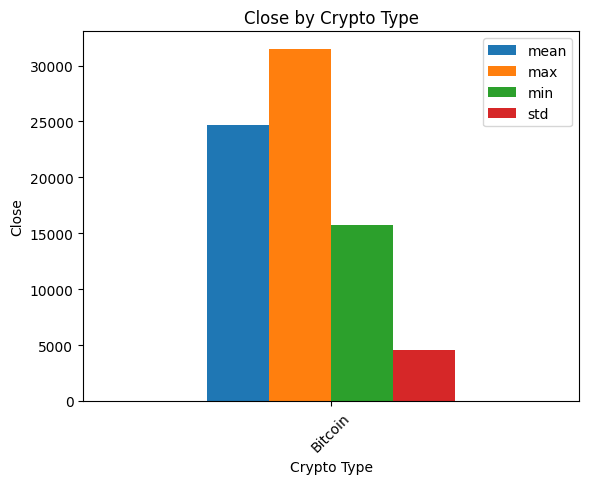

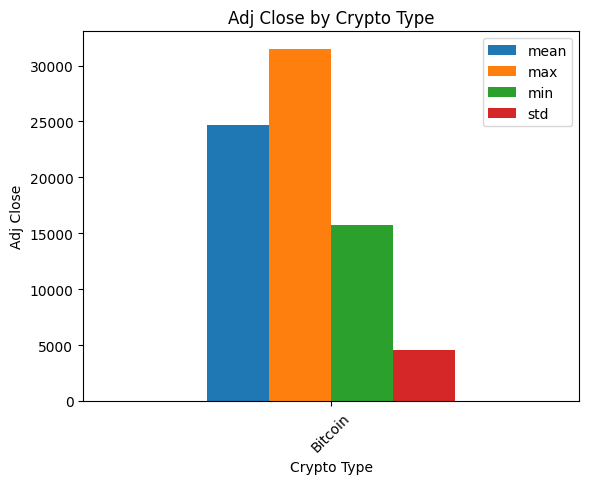

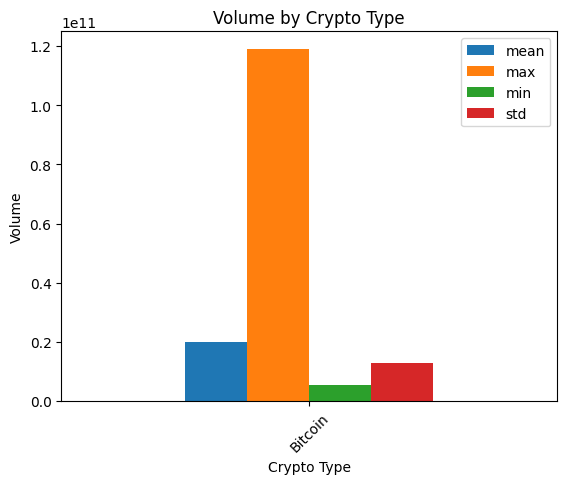

In [10]:
import matplotlib.pyplot as plt

# Gráfico de barras para cada métrica por tipo de criptomoneda
metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for metric in metrics:
    summary_data[metric].plot(kind='bar', title=f'{metric} by Crypto Type')
    plt.xlabel('Crypto Type')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.savefig(f'{metric}_bar_chart.png', bbox_inches='tight')
    plt.show()


In [12]:
from openpyxl import Workbook
from openpyxl.drawing.image import Image

# Crear un libro de Excel
workbook = Workbook()
sheet = workbook.active
sheet.title = 'Summary'

# Insertar la imagen en la celda K1
img = Image(image_path)
sheet.add_image(img, 'K1')

# Guardar el archivo Excel
workbook.save('crypto_summary_data.xlsx')



### Me sale todo hasta antes del envio al correo, como en el ejercicio anterior. PEro todo lo demas si me salio

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

# Configurar el mensaje
msg = MIMEMultipart()
msg['From'] = 'tucorreo@gmail.com'
msg['To'] = 'destinatario@gmail.com'
msg['Subject'] = 'Informe de Criptomonedas'
msg.attach(MIMEText('Se adjunta el informe de criptomonedas'))

# Adjuntar el archivo Excel al correo
file_path = 'crypto_summary_data.xlsx'  # Reemplaza con tu ruta de archivo
attachment = open(file_path, 'rb')
part = MIMEBase('application', 'octet-stream')
part.set_payload(attachment.read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', f'attachment; filename= {file_path}')
msg.attach(part)

# Conectar al servidor SMTP
with smtplib.SMTP('smtp.gmail.com', 587) as smtp_server:
    smtp_server.starttls()
    smtp_server.login('manriquejorge1724@gmail.com', '1724jimi')
    smtp_server.send_message(msg)

print('Correo enviado exitosamente')


### Me sale todo hasta antes del envio al correo, como en el ejercicio anterior. PEro todo lo demas si me salio